# PLANTILLA MODELIZACIÓN PARA CLASIFICACIÓN

**IMPORTANTE**: Recuerda hacer una copia de esta plantilla para no machacar la original.

**IMPORTANTE**: Esta plantilla está diseñada para una visión de máximos utilizando el framework de The Ultimate Algo Machine. Si tienes problemas de memoria o rendimiento recuerda reducir el problema mediante:

* Muestreo
* Balanceo undersampling
* Reducir el número de algoritmos a testar
* Reducir el número de parámetros a testar
* Usar random search y especificar un n_iter adecuado

El objetivo de esta plantilla es identificar la configuración del modelo definitivo (algoritmo e hiperparámetros) pero no llegar a este. El modelo definitivo lo entrenaremos con datos reales más adelante, aqui solo lo estamos probando con una muestra.

## IMPORTAR PAQUETES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import classification_report

#from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
import scikitplot as skplt
#from yellowbrick.classifier import discrimination_threshold

#Autocompletar rápido
%config IPCompleter.greedy=True

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [3]:
ruta_proyecto = 'C:/Users/110927/Desktop/EstructuraDirectorio/03_MACHINE_LEARNING/CASOS/00_LeadScoring'

Nombres de los ficheros de datos.

In [4]:
nombre_x = 'x_preseleccionado.pickle'
nombre_y = 'y_preseleccionado.pickle'

Cargar los datos.

In [5]:
x = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_x)
y = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_y)

## MODELIZAR

### Reservar el dataset de validacion

In [6]:
train_x,val_x,train_y,val_y = train_test_split(x,y,test_size=0.3)

### Crear el pipe y el diccionario de algorimos, parámetros y valores a testar

Modificar para dejar solo los algoritmos que se quieran testar.

Modificar los parámetros.

In [7]:
pipe = Pipeline([('algoritmo',RandomForestClassifier())])

grid = [{'algoritmo': [LogisticRegression()],
         'algoritmo__n_jobs': [-1],
         'algoritmo__solver': ['saga'],
         'algoritmo__penalty': ['elasticnet', 'l1', 'l2', 'none'],
         'algoritmo__C': [0,0.25,0.5,0.75,1]}]

### Optimizar los hiper parámetros

Elegir si se quiere usar grid search o random search.

Comentar la opción que no se vaya a usar.

####  Con grid search

In [8]:
grid_search = GridSearchCV(estimator= pipe, 
                            param_grid = grid, 
                            cv = 3, 
                            scoring = 'roc_auc',
                            verbose = 0,
                            n_jobs = -1)
modelo = grid_search.fit(train_x,train_y)

pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score').head(7)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo,param_algoritmo__C,param_algoritmo__n_jobs,param_algoritmo__penalty,param_algoritmo__solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
19,0.05,0.01,0.00,0.00,"LogisticRegression(C=0.25, n_jobs=-1, penalty=...",1,-1,none,saga,"{'algoritmo': LogisticRegression(C=0.25, n_job...",0.84,0.87,0.86,0.85,0.01,1
7,0.08,0.01,0.01,0.01,"LogisticRegression(C=0.25, n_jobs=-1, penalty=...",0.25,-1,none,saga,"{'algoritmo': LogisticRegression(C=0.25, n_job...",0.84,0.87,0.86,0.85,0.01,1
15,0.07,0.01,0.00,0.00,"LogisticRegression(C=0.25, n_jobs=-1, penalty=...",0.75,-1,none,saga,"{'algoritmo': LogisticRegression(C=0.25, n_job...",0.84,0.87,0.86,0.85,0.01,3
11,0.05,0.00,0.01,0.01,"LogisticRegression(C=0.25, n_jobs=-1, penalty=...",0.50,-1,none,saga,"{'algoritmo': LogisticRegression(C=0.25, n_job...",0.84,0.87,0.86,0.85,0.01,4
17,0.05,0.01,0.00,0.00,"LogisticRegression(C=0.25, n_jobs=-1, penalty=...",1,-1,l1,saga,"{'algoritmo': LogisticRegression(C=0.25, n_job...",0.83,0.87,0.86,0.85,0.01,5
13,0.06,0.02,0.00,0.00,"LogisticRegression(C=0.25, n_jobs=-1, penalty=...",0.75,-1,l1,saga,"{'algoritmo': LogisticRegression(C=0.25, n_job...",0.83,0.87,0.86,0.85,0.01,6
9,0.06,0.01,0.00,0.00,"LogisticRegression(C=0.25, n_jobs=-1, penalty=...",0.50,-1,l1,saga,"{'algoritmo': LogisticRegression(C=0.25, n_job...",0.83,0.87,0.86,0.85,0.01,7


In [10]:
modelo.best_estimator_.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('algoritmo',
                 LogisticRegression(C=0.25, n_jobs=-1, penalty='none',
                                    solver='saga'))])>

## EVALUAR

### Predecir sobre validación

In [11]:
pred = modelo.best_estimator_.predict_proba(val_x)[:, 1]

### Evaluar sobre validación

In [12]:
roc_auc_score(val_y, pred)

0.8699859949706557

### Examinar el mejor modelo

In [13]:
modelo.best_estimator_

Pipeline(steps=[('algoritmo',
                 LogisticRegression(C=0.25, n_jobs=-1, penalty='none',
                                    solver='saga'))])

## REPORTING DEL MODELO

### Gain Chart

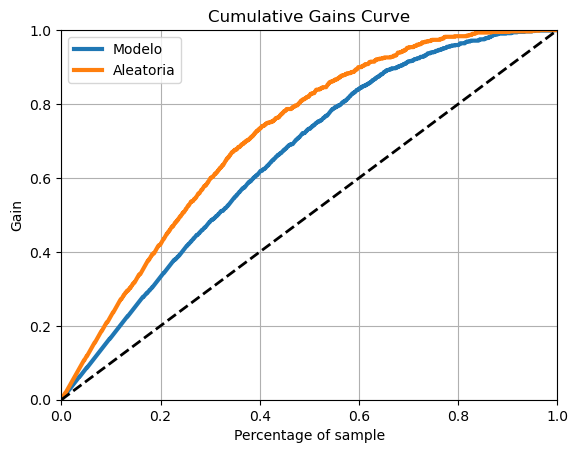

In [15]:
fig, ax = plt.subplots()

skplt.metrics.plot_cumulative_gain(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

#Eliminamos la línea de los ceros y personalizamos la leyenda
                 
plt.legend(labels = ['Modelo','Aleatoria']);

### Lift Chart

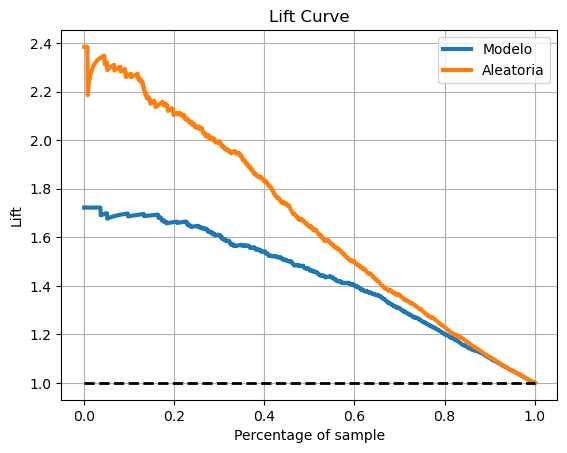

In [17]:
fig, ax = plt.subplots()

skplt.metrics.plot_lift_curve(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

#Eliminamos la línea de los ceros y personalizamos la leyenda
             
plt.legend(labels = ['Modelo','Aleatoria']);

### ROC Chart

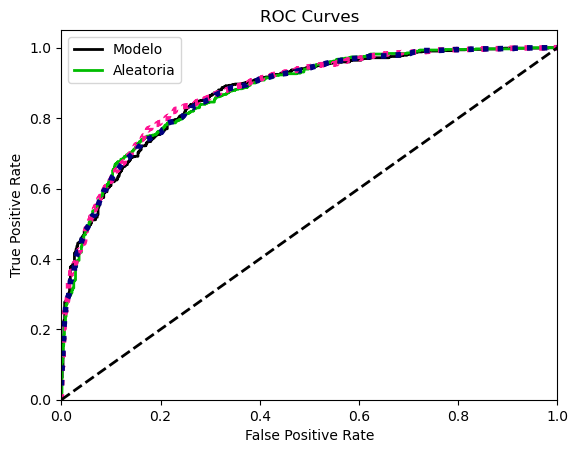

In [18]:
fig, ax = plt.subplots()

skplt.metrics.plot_roc(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

#Eliminamos la línea de los ceros y personalizamos la leyenda

plt.legend(labels = ['Modelo','Aleatoria']);